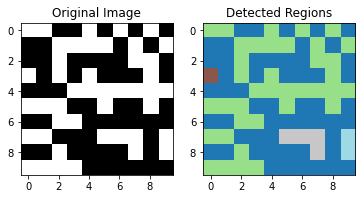

In [1]:
import numpy as np
import matplotlib.pyplot as plt


def detect_regions(binary_img):
    h, w = binary_img.shape
    labels = np.zeros((h, w), dtype=np.int32)
    current_label = 1

    for i in range(h):
        for j in range(w):
            if binary_img[i, j] and not labels[i, j]:
                # flood fill the connected region
                queue = [(i, j)]
                labels[i, j] = current_label
                while queue:
                    x, y = queue.pop(0)
                    for dx, dy in ((-1, -1), (-1, 0), (-1, 1), (0, -1), (0, 1), (1, -1), (1, 0), (1, 1)):
                        if 0 <= x + dx < h and 0 <= y + dy < w and binary_img[x + dx, y + dy] and not labels[x + dx, y + dy]:
                            labels[x + dx, y + dy] = current_label
                            queue.append((x + dx, y + dy))
                current_label += 1

    return labels


if __name__ == '__main__':
    shape = (10, 10)
# Generate black image (sequence)
img = np.random.randint(0, 2, shape).astype(np.uint8) * 255


labels = detect_regions(img)

fig = plt.figure()
rows = 1
columns = 2

fig.add_subplot(rows, columns, 1)
plt.imshow(img, cmap = 'gray')
plt.title("Original Image")

fig.add_subplot(rows, columns, 2)
plt.imshow(labels, cmap='tab20')
plt.title("Detected Regions")

plt.show()
